In [5]:
import pickle
from pathlib import Path
from skimage import io

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import keras

# import Sequential from the keras models module
from keras.models import Sequential

# import Dense, Dropout, Flatten, Conv2D, MaxPooling2D from the keras layers module
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

Using TensorFlow backend.


In [6]:
# 2. Load image labels

# load labels.csv from datasets folder using pandas
labels = pd.read_csv('train_labels.csv',index_col=0)

# print value counts for genus
print((labels.invasive.value_counts()))

# assign the genus label values to y
y = labels.invasive.values

1    1448
0     847
Name: invasive, dtype: int64


Example image has shape:  (866, 1154, 3)
RGB values for the top left pixel are: [32 73 33]


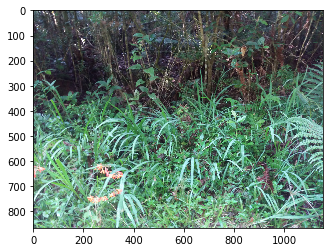

In [7]:
#3. Examine RGB values in an image matrix

# load an image and explore
example_image = io.imread('train/{}.jpg'.format(labels.index[0]))

# show image
plt.imshow(example_image)

# print shape
print('Example image has shape: ', example_image.shape)
                    
# print color channel values for top left pixel
print('RGB values for the top left pixel are:', example_image[0,0,:])

In [8]:
#4. Normalize image data

# initialize standard scaler
ss = StandardScaler()

image_list = []
for i in labels.index:
    # load image
    img = io.imread('train/{}.jpg'.format(i)).astype(np.float64)
    
    # for each channel, apply standard scaler's fit_transform method
    for channel in range(img.shape[2]):
        img[:, :, channel] = ss.fit_transform(img[:, :, channel])
        
    # append to list of all images
    image_list.append(img)
    
# convert image list to single array
X = np.array(image_list)

# print shape of X
print(X.shape)

KeyboardInterrupt: 

In [ ]:
#5. Split into train, test sets


# split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=52)

# examine number of samples in train, test, and validation sets
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


In [ ]:
# 6. Model building

# set model constants
num_classes = 1

# define model as Sequential
model = Sequential()

# first convolutional layer with 32 filters
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(50, 50, 3)))

# add a second 2D convolutional layer with 64 filters
model.add(Conv2D(64,kernel_size=(3, 3), activation='relu'))

# reduce dimensionality through max pooling
model.add(MaxPooling2D(pool_size=(2,2)))

# third convolutional layer with 64 filters
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
# add dropout to prevent over fitting
model.add(Dropout(0.25))
# necessary flatten step preceeding dense layer
model.add(Flatten())
# fully connected layer
model.add(Dense(128, activation='relu'))

# add additional dropout to prevent overfitting
model.add(Dropout(0.5))

# prediction layers
model.add(Dense(num_classes, activation='sigmoid', name='preds'))

# show model summary
model.summary()

In [ ]:
#7. Compile and train model

model.compile(
    # set the loss as binary_crossentropy
    loss=keras.losses.binary_crossentropy,
    # set the optimizer as stochastic gradient descent
    optimizer=keras.optimizers.SGD(lr=0.001),
    # set the metric as accuracy
    metrics=['accuracy']
)

# mock-train the model using the first ten observations of the train and test sets
model.fit(
    x_train,
    y_train,
    epochs=200,
    verbose=1,
    validation_data=(x_test, y_test)
)



In [ ]:
#8. evaluate model

# evaluate model on test set
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

print("")

# evaluate model on holdout set
eval_score = model.evaluate(x_eval, y_eval, verbose=0)
# print loss score
print('Eval loss:', score[0])
# print accuracy score
print('Eval accuracy:', score[1])

In [ ]:
#9. Visualize model training history

with open('model_history.pkl', 'rb') as f:
    model_history = pickle.load(f)

# print keys for pretrained_cnn_history dict
print(model_history.keys())

fig = plt.figure(1)
plt.subplot(211)
# plot the validation accuracy
plt.plot(model_history['val_acc'])
plt.title('Validation accuracy and loss')
plt.ylabel('Accuracy')
plt.subplot(212)
# plot the validation loss
plt.plot(model_history['val_loss'], 'r')
plt.xlabel('Epoch')
plt.ylabel('Loss value');

In [ ]:
#10. Generate predictions

# initialize standard scaler
ss_eval = StandardScaler()

import glob
image_list = []
for filename in glob.glob('test/*.jpg'):

    
    img = io.imread(filename).astype(np.float64)
    
    # for each channel, apply standard scaler's fit_transform method
    for channel in range(img.shape[2]):
        img[:, :, channel] = ss_eval.fit_transform(img[:, :, channel])
        
    # append to list of all images
    image_list.append(img)
    
# convert image list to single array
x_eval = np.array(image_list)

# print shape of X
print(x_eval.shape)

# predicted probabilities for x_eval
y_proba = model.predict(x_eval)

print("First five probabilities:")
print(y_proba[:5])
print("")

# predicted classes for x_eval
y_pred = pretrained_cnn.predict_classes(x_eval)

print("First five class predictions:")
print(y_pred[:5])
print("")